<a href="https://colab.research.google.com/github/Leucocitokiller/Proyecto-Fina-NLP/blob/main/NLP_Jack_Reacher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚 Análisis NLP sobre texto de una novela.

### Carga del texto.

In [176]:
import requests

# URL del archivo en GitHub
url = 'https://raw.githubusercontent.com/Leucocitokiller/Proyecto-Fina-NLP/refs/heads/main/Zona%20peligrosa%20-%20Lee%20Child.txt'

# Descargar el contenido del archivo
response = requests.get(url)

# Verificar si la descarga fue exitosa
if response.status_code == 200:
    libro = response.text.replace("\r\n", "\n")  # 🔧 Normalizar saltos de línea
    print("Archivo cargado correctamente.")
else:
    print("Hubo un error al cargar el archivo.")

# Mostrar las primeras 500 palabras del texto

print(libro[:500])


Archivo cargado correctamente.
1


Me detuvieron en la cafetería de Eno. A las doce del mediodía. Estaba comiendo unos huevos y bebiendo café. Un desayuno tardío, no un almuerzo. Estaba mojado y exhausto después de una larga caminata bajo la intensa lluvia. Desde la autopista hasta el límite municipal.

La cafetería era pequeña, pero limpia y luminosa. Nuevecita, construida a imitación de un vagón de tren. Estrecha, con una larga barra a un lado y una cocina encajonada al fondo. Una hilera de mesas con bancos de respaldo alto


## 🧠 Técnicas de NLP aplicadas

### **Importacion de librerias**

In [2]:
!python -m spacy download es_core_news_md

import spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 15.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Descargar modelo en español mediano de SPACY

In [19]:
from spacy.lang.es.stop_words import STOP_WORDS  # importo el listado de palabras STOP WORDS
import es_core_news_md
#es_core_news_md Medium (modelo mediano):
#Es más pesado y más lento que el sm, pero mucho más preciso. Tiene vectores de palabras, entiende mejor el significado de las palabras.

nlp = es_core_news_md.load()

# es ahora un objeto de spaCy que se puede utilizar para procesar texto en español.
# Este objeto permite realizar análisis avanzados del lenguaje, como tokenización, lematización, análisis de dependencias, etc.


In [124]:
# Generamos un objeto tipo DOC que Spacy devuelve depuses de procesar el texto.
# Como primer paso de EDA sobre el texto, se pone todo en minúscula.
doc = nlp(libro.lower())

In [112]:
# Tokenización + lematización + eliminación de stopwords y puntuación.
tokens_limpios = [
    token.lemma_                      # lematizado
    for token in doc
    if not token.is_stop             # eliminar stopwords
    and not token.is_punct           # eliminar puntuación
    and not token.is_space           # eliminar espacios en blanco
]


for token in tokens_limpios[:20]: # Para cada elemento individual "token" en "t" (donde t es el texto que teníamos en la línea de código anterior.)... imprimir el nombre del token y la ubicación de cada token.
    print(token)  # Acuerdense que se comienza en 0



1
detener
cafetería
eno
mediodía
comer
huevo
beber
café
desayuno
tardío
almuerzo
mojado
exhausto
largo
caminata
intenso
lluvia
autopista
límite


## **Reconocimiento de Entidades Nombradas (NER)**
## **Qué es:**
## Detecta entidades importantes como nombres de personas, lugares, fechas, organizaciones, etc.

## **Para qué sirve:**
## Es fundamental para tareas como extracción de información, motores de búsqueda inteligentes o asistentes virtuales.

## NO SE USA CON EL TEXTO YA LEMATIZADO!! SE DEBE USAR EL TEXTO TOKENIZADO ORIGINAL.


In [113]:
from collections import Counter # Import the Counter object


# Extraer entidades tipo PERSON
entidades = [(ent.text, ent.label_) for ent in doc.ents]

# Contar apariciones
entidades_counts = Counter(entidades)

# Mostrar los 20 personajes más mencionados
print(entidades_counts.most_common(20))

[(('¿', 'LOC'), 671), (('finlay', 'PER'), 201), (('hubble', 'PER'), 167), (('hubble', 'MISC'), 132), (('kliner', 'PER'), 84), (('joe', 'MISC'), 78), (('morrison', 'PER'), 76), (('pregunté', 'PER'), 68), (('atlanta', 'LOC'), 65), (('picard', 'PER'), 61), (('charlie', 'PER'), 56), (('joe', 'PER'), 52), (('tenía', 'LOC'), 47), (('qué', 'MISC'), 40), (('kelstein', 'PER'), 38), (('georgia', 'LOC'), 36), (('florida', 'LOC'), 34), (('continuación', 'PER'), 33), (('¿', 'MISC'), 32), (('stevenson', 'PER'), 28)]


## **. WordCloud (Nube de Palabras)**
## **Qué es:**
## Una visualización que muestra las palabras más frecuentes en tamaño proporcional a su frecuencia.

## **Para qué sirve:**
## Es una forma rápida y visual de entender de qué trata un texto sin leerlo todo.

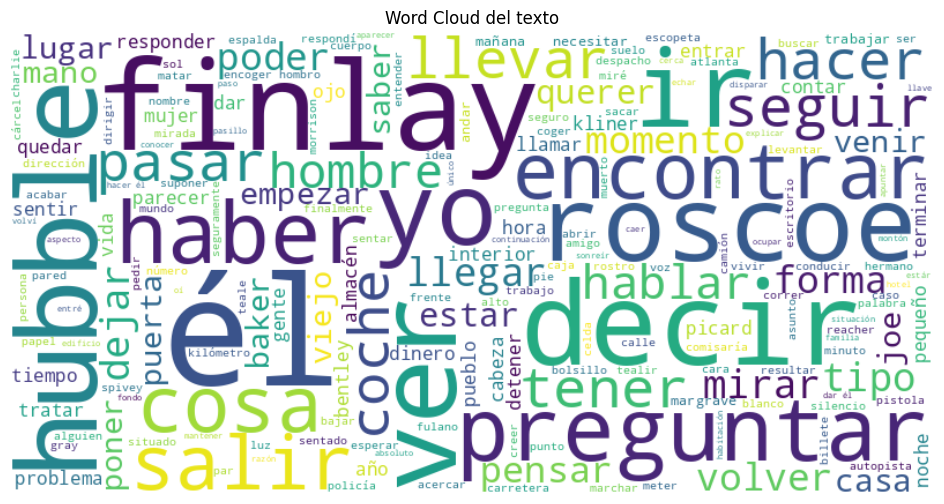

In [115]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens_limpios))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud del texto")
plt.show()

## **Palabras más frecuentes**
## **Qué es:**
## Contar qué palabras aparecen más veces en el texto después de limpiar el contenido.

## **Para qué sirve:**
## Ayuda a identificar temas principales o patrones en el texto. Es común en análisis exploratorios y visualización de texto.

In [116]:
frecuencia = Counter(tokens_limpios).most_common(50)

for palabra, cuenta in frecuencia:
    print(f"{palabra}: {cuenta}")

finlay: 582
decir: 460
hubble: 449
roscoe: 406
ver: 393
puerta: 368
ir: 347
preguntar: 336
salir: 293
haber: 289
cabeza: 285
mirar: 285
cosa: 271
coche: 269
hombre: 264
hacer: 263
seguir: 261
llevar: 258
encontrar: 257
llegar: 252
momento: 247
dejar: 239
hablar: 238
pasar: 236
tener: 235
volver: 233
poder: 230
año: 224
tipo: 221
kliner: 216
mano: 214
forma: 202
joe: 196
viejo: 195
casa: 195
pensar: 194
querer: 193
estar: 187
billete: 171
lugar: 171
poner: 169
empezar: 168
quedar: 161
baker: 157
venir: 156
entrar: 155
problema: 155
saber: 150
hora: 150
dar: 150


## **POS-tagging (Part-of-Speech Tagging)**
#### **Qué es:**
#### Es etiquetar cada palabra con su categoría gramatical: sustantivo, verbo, adjetivo, etc.

#### **Para qué sirve:**
#### Permite hacer análisis gramaticales y entender mejor la estructura del texto. Es útil en traducción automática, análisis sintáctico y generación de texto.

NUM: 1691
PRON: 13239
VERB: 23600
ADP: 24089
DET: 21855
NOUN: 32043
AUX: 7832
CCONJ: 5150
ADJ: 9817
ADV: 7590
PROPN: 2351
SCONJ: 4468
INTJ: 164
PUNCT: 16
PART: 3
SYM: 3


<ipython-input-117-2a7e4b6f7d5b>:44: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Ajusta todo para que no se solapen los elementos
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


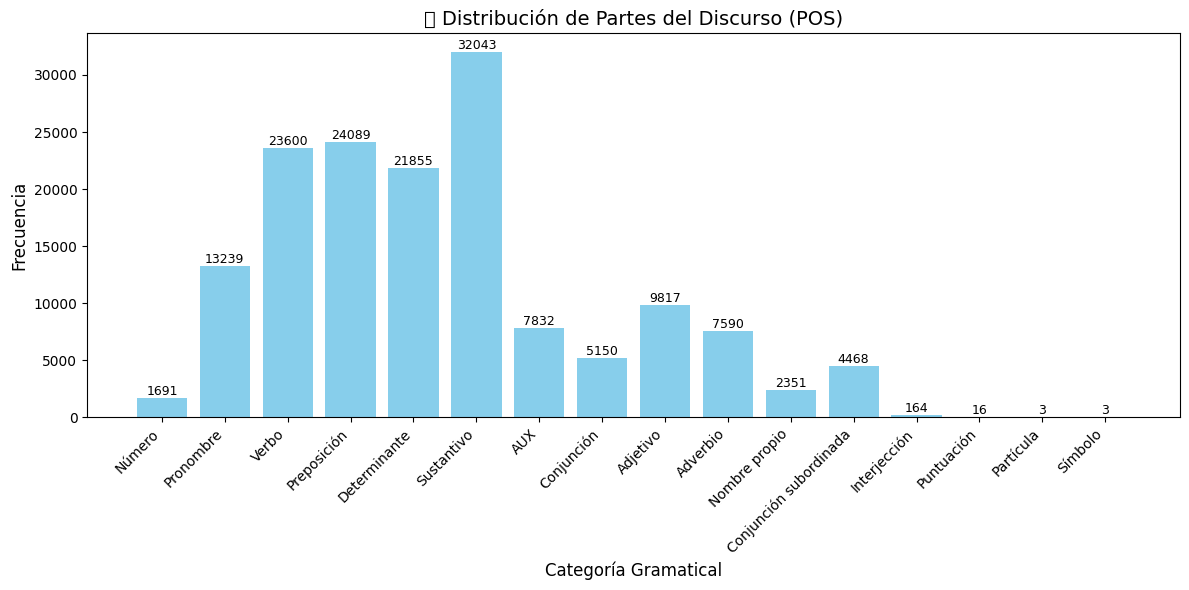

In [117]:
# Contar partes de la oración (POS tags)
pos_counts = Counter(token.pos_ for token in doc if not token.is_punct and not token.is_space)

# Mostrar resumen
for pos, cantidad in pos_counts.items():
    print(f"{pos}: {cantidad}")

traduccion_pos = {
    "NOUN": "Sustantivo",
    "VERB": "Verbo",
    "ADJ": "Adjetivo",
    "ADV": "Adverbio",
    "PRON": "Pronombre",
    "PROPN": "Nombre propio",
    "ADP": "Preposición",
    "CCONJ": "Conjunción",
    "DET": "Determinante",
    "INTJ": "Interjección",
    "NUM": "Número",
    "PART": "Partícula",
    "SCONJ": "Conjunción subordinada",
    "PUNCT": "Puntuación",
    "SYM": "Símbolo",
    "X": "Otro"
}

# Traducir claves al español
pos_counts_es = {
    traduccion_pos.get(etiqueta, etiqueta): cantidad
    for etiqueta, cantidad in pos_counts.items()
}
# Graficar
etiquetas = list(pos_counts_es.keys())
valores = list(pos_counts.values())

plt.figure(figsize=(12, 6))
bars = plt.bar(etiquetas, valores, color='skyblue')
plt.title("📊 Distribución de Partes del Discurso (POS)", fontsize=14)
plt.xlabel("Categoría Gramatical", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)


plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()  # Ajusta todo para que no se solapen los elementos

# Agrega etiquetas de valor sobre las barras.
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, str(height), ha='center', va='bottom', fontsize=9)

plt.show()


## Analisis con Post Tagging

### 🔍 Paso 1: Extraer palabras por categoría gramatical

In [118]:
Sustantivos = [token.text for token in doc if token.pos_ == "NOUN"]
verbos = [token.lemma_ for token in doc if token.pos_ == "VERB"]
Adjectivos = [token.text for token in doc if token.pos_ == "ADJ"]
Pronombres = [token.text for token in doc if token.pos_ == "PROPN"]

### 🧑‍🎨 Paso 2: Análisis de estilo del autor

In [119]:
total_tokens = len([t for t in doc if not t.is_punct and not t.is_space])
pos_tags = [token.pos_ for token in doc if not token.is_punct and not token.is_space]
pos_counts = Counter(pos_tags)

print("Porcentaje de uso por tipo gramatical:")
for pos, count in pos_counts.items():
    print(f"{pos}: {100 * count / total_tokens:.2f}%")

Porcentaje de uso por tipo gramatical:
NUM: 1.10%
PRON: 8.60%
VERB: 15.33%
ADP: 15.65%
DET: 14.20%
NOUN: 20.82%
AUX: 5.09%
CCONJ: 3.35%
ADJ: 6.38%
ADV: 4.93%
PROPN: 1.53%
SCONJ: 2.90%
INTJ: 0.11%
PUNCT: 0.01%
PART: 0.00%
SYM: 0.00%


📝 Interpretación de los porcentajes:
- Sustantivos (NOUN: 20.04%):

Hay una proporción alta de sustantivos, lo que sugiere que el texto es descriptivo, ya que los sustantivos tienden a estar presentes en las descripciones de personas, lugares, objetos, etc.

- Verbos (VERB: 15.56%):

El uso de verbos también es bastante alto, lo que indica una narrativa activa, con mucha acción o movimiento en el texto.

- Adjetivos (ADJ: 6.58%):

Los adjetivos ayudan a caracterizar los sustantivos y aportan detalles. Es un buen número que refleja un texto que incluye descripciones detalladas.

- Pronombres (PRON: 8.66%):

El texto utiliza muchos pronombres, lo que es típico en narraciones en primera o tercera persona, ya que reemplazan nombres y evitan la repetición.

- Preposiciones (ADP: 15.64%):

Un porcentaje alto de preposiciones puede indicar que el texto está muy enfocado en las relaciones espaciales, temporales o lógicas entre las entidades, algo común en textos descriptivos.

- Determinantes (DET: 14.13%):

Similar a los pronombres, los determinantes acompañan a los sustantivos y aportan información adicional. El número sugiere que se está especificando bastante.

- Adverbios (ADV: 4.98%):

La presencia de adverbios puede estar relacionada con matizar o intensificar acciones o descripciones, lo cual es relevante en narrativa y diálogos.

### 🧱 Paso 3: Identificación de estructuras de oraciones

#### Separar el libro por capitulos y guardar la estructura de cada oración.

In [177]:
import re

# Separar el texto por líneas que solo contienen un número (capítulos)
capitulos = re.split(r'\n\s*\d+\s*\n', libro)

# Limpiar espacios y eliminar fragmentos vacíos
capitulos = [c.strip() for c in capitulos if c.strip()]
capitulos = [c.strip() for c in capitulos if c.strip()] # manejo los saltos de linea al incio
# Asociar los capítulos a su número real (1, 2, 3, ...)
capitulos_numerados = {i + 1: texto for i, texto in enumerate(capitulos)}

# Ejemplo: mostrar el inicio de los primeros 3 capítulos
for num, texto in list(capitulos_numerados.items())[:3]:
    print(f"\n🧱 Capítulo {num}\n{texto[:300]}...\n")



🧱 Capítulo 1
1


Me detuvieron en la cafetería de Eno. A las doce del mediodía. Estaba comiendo unos huevos y bebiendo café. Un desayuno tardío, no un almuerzo. Estaba mojado y exhausto después de una larga caminata bajo la intensa lluvia. Desde la autopista hasta el límite municipal.

La cafetería era pequeña, ...


🧱 Capítulo 2
Nos detuvimos frente a las puertas de un edificio bajo y alargado. Baker salió del coche y miró la fachada de arriba abajo. Los dos de refuerzo se situaron cerca. Stevenson rodeó la parte trasera del coche y se apostó frente a Baker. Me encañonó con la escopeta. Buenos profesionales. Baker me abrió ...


🧱 Capítulo 3
Volvieron a conducirme esposado al despacho decorado con madera de palisandro. Finlay estaba sentado ante el gran escritorio, con las banderas a sus espaldas, debajo del gran reloj. Baker se acomodó en una silla a un lado del escritorio. Tomé asiento frente a Finlay. Este sacó la grabadora. Deslió l...



In [178]:
# Lista para guardar las oraciones por capítulo
oraciones_por_capitulo = []

# Procesar cada capítulo y guardar sus oraciones
for capitulo, texto in capitulos_numerados.items():  # Get both chapter number and text
    doc_cap = nlp(texto)  # Process the chapter text
    oraciones = [sent.text.strip() for sent in doc_cap.sents]
    oraciones_por_capitulo.append(oraciones)  # Cada elemento es una lista de oraciones

# Ahora podés acceder fácilmente a cualquier oración de cualquier capítulo
# Ejemplo: mostrar la tercera oración del capítulo 2 (índice 1)
print(oraciones_por_capitulo[32][2]) # Assuming there are at least 33 chapters


Con las luces apagadas y a poca velocidad.


In [179]:
oraciones_por_capitulo[0][0]

'1\n\n\nMe detuvieron en la cafetería de Eno.'

#### 🧩 Árbol de análisis (Parse Tree)

In [181]:
from spacy import displacy

oración_prueba_doc = nlp(oraciones_por_capitulo[0][2])

# Mostrar las relaciones de dependencia y el árbol de análisis
for token in oración_prueba_doc:
    print(f"{token.text} -> {token.dep_} -> {token.head.text}")

displacy.render(oración_prueba_doc, style='dep', jupyter=True, options={'distance': 90})

Estaba -> aux -> comiendo
comiendo -> ROOT -> comiendo
unos -> det -> huevos
huevos -> obj -> comiendo
y -> cc -> bebiendo
bebiendo -> conj -> comiendo
café -> obj -> bebiendo
. -> punct -> comiendo


### 🧹 Paso 4: Filtrado para Topic Modeling o Clustering separando capitulos y tokenizando

✅ Para guardar tokens filtrados por oración y por capítulo:


In [86]:
tokens_por_oracion_y_capitulo = []

for capitulo in capitulos:
    doc2 = nlp(capitulo)
    oraciones_tokens = []
    for sent in doc2.sents:
        tokens_filtrados = [
            token.lemma_.lower()
            for token in sent
            if token.pos_ in ("NOUN", "VERB", "ADJ")  #✅ Extraer los lemas más relevantes (sustantivos, verbos y adjetivos) de cada oración.
            and not token.is_stop
            and not token.is_punct
            and not token.is_space
        ]
        oraciones_tokens.append(tokens_filtrados)
    tokens_por_oracion_y_capitulo.append(oraciones_tokens)


#### Comparacion de oraciones originales y tokenizadas

In [87]:
print("🟦 Oración original:")
print(oraciones_por_capitulo[0][5])

print("\n✅ Oración procesada (tokens filtrados):")
print(tokens_por_oracion_y_capitulo[0][5])

🟦 Oración original:
Estaba mojado y exhausto después de una larga caminata bajo la intensa lluvia.

✅ Oración procesada (tokens filtrados):
['mojado', 'exhausto', 'largo', 'caminata', 'intenso', 'lluvia']


### Obtencion de personajes


In [103]:
from collections import Counter

# --- 1. Extraer entidades tipo PERSON con spaCy ---
per_entidades = {
    ent.text.strip()
    for ent in doc4.ents
    if ent.label_ == "PER" and 1 <= len(ent.text.split()) <= 3
}

# --- 2. Extraer secuencias de nombres propios (PROPN) ---
propn_entidades = []
temp = []

for token in doc4:
    if token.pos_ == "PROPN" and token.text.istitle() and token.text.isalpha():
        temp.append(token.text)
    else:
        if temp:
            nombre = " ".join(temp)
            if 1 <= len(temp) <= 3:
                propn_entidades.append(nombre)
            temp = []

# --- 3. Unir ambas listas ---
todos_los_nombres = list(per_entidades) + propn_entidades

# --- 4. Filtrar falsos positivos comunes (opcional) ---
excluir = {"Atlanta", "Princeton", "Jacksonville", "Lincoln", "Mozart", "Margrave", "Ford", "Gibson","Eno","Florida","Dios","Estados Unidos","Boston","Washington","Pluribus","Chevy","Miró","Main Street","Nueva York"}
nombres_filtrados = [nombre for nombre in todos_los_nombres if nombre not in excluir]

# --- 5. Contar apariciones ---
conteo = Counter(nombres_filtrados)
for nombre, cantidad in conteo.most_common(40):
    print(f"{nombre}: {cantidad}")


Finlay: 582
Hubble: 417
Roscoe: 381
Kliner: 203
Joe: 188
Baker: 157
Teale: 140
Picard: 132
Bentley: 112
Morrison: 111
Charlie: 91
Reacher: 80
Spivey: 72
Gray: 61
Kelstein: 44
Stevenson: 41
Judy: 36
Molly: 35
Stoller: 34
Georgia: 34
Sherman: 33
Beckman Drive: 33
Sherman Stoller: 31
Blind Blake: 27
Warburton: 23
Desert Eagle: 23
Charlie Hubble: 21
Bartholomew: 21
Buick: 19
Tesoro: 18
Augusta: 18
Harvard: 17
Cadillac: 17
Paul Hubble: 15
Blake: 15
Spirenza: 14
Hub: 14
Aparqué: 13
Departamento: 12
Tampa: 12


### Escenas de Acción de Reacher

In [105]:
verbos_violentos = {
    "golpear", "matar", "disparar", "empujar", "derribar",
    "romper", "luchar", "pelear", "patear", "apuñalar",
    "estrangular", "quebrar", "asfixiar", "ahorcar", "herir",
    "abatir", "asesinar", "enfrentar", "tumbar"
}


In [107]:
acciones_violentas_reacher = []

for capitulo in capitulos:
    doc5 = nlp(capitulo)
    acciones_en_cap = 0

    for sent in doc.sents:
        if any(ent.text.lower() == "reacher" and ent.label_ == "PER" for ent in sent.ents):
            verbos = [token.lemma_.lower() for token in sent if token.pos_ == "VERB"]
            if any(verb in verbos_violentos for verb in verbos):
                acciones_en_cap += 1

    acciones_violentas_reacher.append(acciones_en_cap)


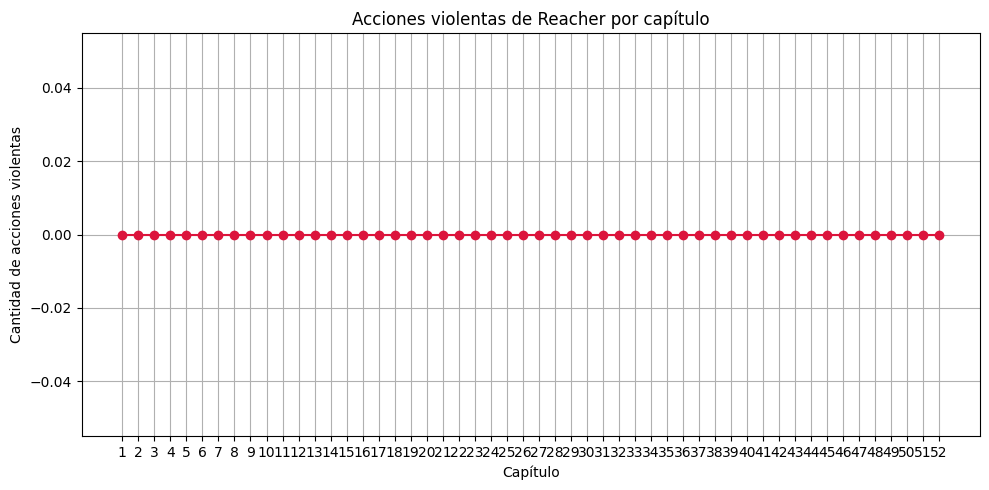

In [108]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(acciones_violentas_reacher)+1), acciones_violentas_reacher, marker='o', color='crimson')
plt.title("Acciones violentas de Reacher por capítulo")
plt.xlabel("Capítulo")
plt.ylabel("Cantidad de acciones violentas")
plt.grid(True)
plt.xticks(range(1, len(acciones_violentas_reacher)+1))
plt.tight_layout()
plt.show()


## **1. Tokenización**
### **Qué es:**
### Es el proceso de dividir un texto en unidades más pequeñas llamadas tokens (normalmente palabras).

### **Para qué sirve:**
### Permite analizar el texto palabra por palabra. Es el primer paso para casi todas las tareas de NLP.


## **2. Lematización**
## **Qué es:**
## Consiste en reducir las palabras a su forma base o raíz (lema).
## Ejemplo: "corriendo", "corría", "corriste" → "correr".

## **Para qué sirve:**
## Ayuda a agrupar palabras similares para análisis más precisos. Muy útil en análisis de sentimientos, búsqueda de información o resumen automático.

Usando SPacy


## **🧹 3. Limpieza **
## -STOP_WORDS: quita palabras comunes como "de", "que", "en", "la", que no aportan significado útil.

## -string.punctuation: elimina signos como .,!?¿...

## -isalpha(): se asegura de quedarte solo con palabras (sin números ni símbolos).

USando Spacy

## 📌 Contar cuántos verbos, sustantivos, etc. hay:

In [ ]:
from collections import Counter

pos_counts = Counter(token.pos_ for token in doc)
print(pos_counts)


Counter({'NOUN': 30264, 'PUNCT': 25975, 'ADP': 24139, 'DET': 23180, 'VERB': 22642, 'PRON': 13418, 'ADJ': 9298, 'AUX': 7760, 'ADV': 7620, 'PROPN': 6988, 'CCONJ': 5147, 'SCONJ': 4492, 'SPACE': 4130, 'NUM': 1740, 'INTJ': 128, 'PART': 3})


## 📊 Gráfica de los resultados:

In [ ]:
# 🧾 5. Named Entity Recognition (NER)

# Extraer entidades tipo PERSON
person_entities = [ent.text for ent in doc.ents if ent.label_ == "PER"]

# Contar apariciones
person_counts = Counter(person_entities)

# Mostrar los 20 personajes más mencionados
print(person_counts.most_common(20))


[('Joe', 9), ('Roscoe', 8), ('Finlay', 7), ('Kliner', 5), ('Picard', 4), ('Había', 3), ('Volví', 2), ('Charlie Hubble', 2), ('Así', 2), ('Eno', 2), ('Warburton', 2), ('Macon', 2), ('A Kliner', 1), ('Donde Kliner', 1), ('Aceptamos', 1), ('Molly', 1), ('qué justificar mis acciones', 1), ('Hicimos', 1), ('estrés', 1), ('Podían', 1)]


In [ ]:
normalized_persons = [person_map.get(ent.text, ent.text) for ent in doc.ents if ent.label_ == "PER"]


## **6. Palabras más frecuentes**
## **Qué es:**
## Contar qué palabras aparecen más veces en el texto después de limpiar el contenido.

## **Para qué sirve:**
## Ayuda a identificar temas principales o patrones en el texto. Es común en análisis exploratorios y visualización de texto.

In [ ]:

from collections import Counter

frecuencia = Counter(lemmas_limpios).most_common(50)
for palabra, freq in frecuencia:
    print(f"{palabra}: {freq}")

finlay: 506
hubble: 422
do: 386
roscoe: 372
puerta: 296
cabeza: 279
hombre: 261
iba: 248
momento: 243
coche: 234
kliner: 208
forma: 203
joe: 190
casa: 183
años: 181
tipo: 167
lugar: 159
mano: 148
cosas: 147
dinero: 147
baker: 144
billetes: 142
teale: 141
miró: 140
silencio: 139
mujer: 133
hubiera: 132
dirección: 129
podía: 128
viejo: 128
policía: 127
tiempo: 127
vi: 124
cosa: 124
visto: 123
pueblo: 121
hombros: 118
picard: 117
interior: 116
miré: 115
volvió: 114
mañana: 113
margrave: 112
quería: 112
ojos: 111
bentley: 111
vida: 110
seguía: 109
problema: 107
llevaba: 106


## **7. WordCloud (Nube de Palabras)**
## **Qué es:**
## Una visualización que muestra las palabras más frecuentes en tamaño proporcional a su frecuencia.

## **Para qué sirve:**
## Es una forma rápida y visual de entender de qué trata un texto sin leerlo todo.

## **8. Bigramas / Trigramas (n-gramas)**
## **Qué es:**
## Son combinaciones de palabras consecutivas.
## Ejemplo: bigrama de “Don Quijote cabalgaba” → (“Don”, “Quijote”), (“Quijote”, “cabalgaba”).

## **Para qué sirve:**
## Permite detectar frases frecuentes y patrones en cómo se usan las palabras juntas. Muy usado en modelado de lenguaje, traducción y detección de estilo.

In [ ]:
from collections import Counter

# Crear bigramas correctamente (palabras consecutivas)
bigrams = list(zip(lemmas_limpios, lemmas_limpios[1:]))

# Contar frecuencia de los bigramas
bigrams_freq = Counter(bigrams).most_common(30)

# Guardar los resultados en una variable
bigrams_mas_frecuentes = [{"bigrama": bg, "frecuencia": freq} for bg, freq in bigrams_freq]

# Mostrar los bigramas
for item in bigrams_mas_frecuentes:
    print(f"{item['bigrama']}: {item['frecuencia']}")


('encogió', 'hombros'): 50
('encogí', 'hombros'): 43
('beckman', 'drive'): 33
('carretera', 'condado'): 30
('sherman', 'stoller'): 30
('asintió', 'cabeza'): 27
('billetes', 'falsos'): 27
('meneó', 'cabeza'): 24
('mil', 'dólares'): 24
('billetes', 'dólar'): 23


In [ ]:
import spacy

# Cargar el modelo en español
nlp = spacy.load("es_core_news_sm")

# Procesar el texto completo
doc = nlp(libro)

# Extraer todas las oraciones
oraciones = [sent.text.strip() for sent in doc.sents]

# Mostrar las primeras 10 oraciones
for i, oracion in enumerate(oraciones[:10]):
    print(f"{i+1}: {oracion}")



1: 1


Me detuvieron en la cafetería de Eno.
2: A las doce del mediodía.
3: Estaba comiendo unos huevos y bebiendo café.
4: Un desayuno tardío, no un almuerzo.
5: Estaba mojado y exhausto después de una larga caminata bajo la intensa lluvia.
6: Desde la autopista hasta el límite municipal.
7: La cafetería era pequeña, pero limpia y luminosa.
8: Nuevecita, construida a imitación de un vagón de tren.
9: Estrecha, con una larga barra a un lado y una cocina encajonada al fondo.
10: Una hilera de mesas con bancos de respaldo alto al otro lado.


## **1 🧠 Palabras clave de pelea.**



In [109]:
palabras_pelea =  {
    "golpear", "matar", "disparar", "empujar", "derribar",
    "romper", "luchar", "pelear", "patear", "apuñalar",
    "estrangular", "quebrar", "asfixiar", "ahorcar", "herir",
    "abatir", "asesinar", "enfrentar", "tumbar"
}



## **🔧 Detectar peleas por capítulo**

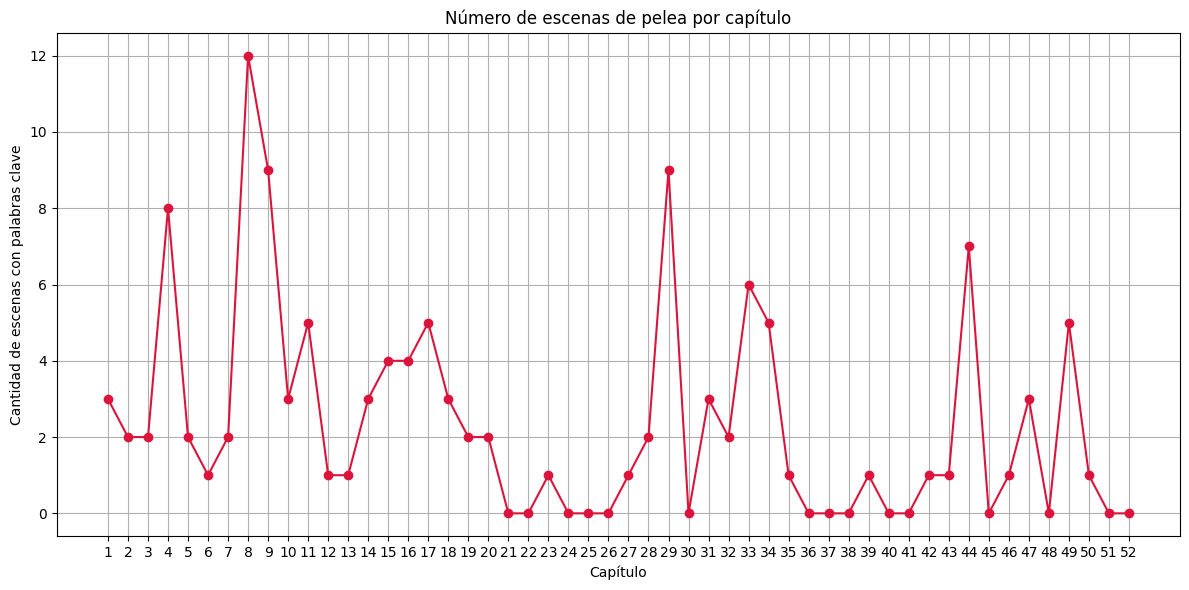

In [110]:
import spacy
import matplotlib.pyplot as plt

# Cargar modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")


# Separar por capítulos (suponiendo que empiezan con "CAPÍTULO" o número)
import re


# Guardar cantidad de frases con pelea por capítulo
conteo_pelea_por_capitulo = []
frases_pelea = []

for cap in capitulos:
    doc = nlp(cap)
    oraciones = [sent.text.strip() for sent in doc.sents]
    frases = [frase for frase in oraciones if any(pal in frase.lower() for pal in palabras_pelea)]
    frases_pelea.append(frases)  # para verlas después si querés
    conteo_pelea_por_capitulo.append(len(frases))

# 📊 Graficar
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(conteo_pelea_por_capitulo)+1), conteo_pelea_por_capitulo, marker='o', color='crimson')
plt.title("Número de escenas de pelea por capítulo")
plt.xlabel("Capítulo")
plt.ylabel("Cantidad de escenas con palabras clave")
plt.xticks(range(1, len(conteo_pelea_por_capitulo)+1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Mostrar solo capítulos con frases de pelea
for i, frases in enumerate(frases_pelea, 1):  # empieza en 1
    if frases:  # Solo mostrar si hay frases
        print(f"📘 Capítulo {i}")
        for frase in frases:
            print(f" - {frase}")
        print("\n" + "="*80 + "\n")

📘 Capítulo 1
 - Situado demasiado cerca, el revólver podía no dar en el blanco en caso de que hubiera lucha, y un disparo de escopeta desde la puerta acabaría conmigo, pero de propina mataría al agente encargado de la detención y al viejo de la mesa del fondo.
 - Un disparo al techo, quizá, y un buen codazo en la cara del policía, y la escopeta muy bien podría ser mía.
 - Una mano en mi espalda me empujó a través de la puerta.


📘 Capítulo 2
 - Baker golpeó en la puerta con los nudillos.
 - Dio dos golpes en la puerta con los nudillos.


📘 Capítulo 3
 - Levantó la mirada un momento y prosiguió:

—La víctima recibió dos disparos en la cabeza.
 - El primer disparo fue hecho de muy cerca, en la sien izquierda.
 - El primer disparo seguramente fue mortal de necesidad.
 - —Su primer disparo lo mató —dijo Baker—.
 - Le disparó una segunda vez, y entonces perdió el control y se puso a patear el cadáver hasta dejarlo machacado.
 - Primero le disparó y luego hizo lo posible por destrozarlo a pa

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

# REPOSITORIO DE CODIGO PARA VER LUEGO

# **Analisis de Sentimientos por Oración**

## **✅ Carga del modelo de sentimientos**

In [ ]:
from transformers import pipeline
from spacy.lang.es import Spanish

# Cargar el modelo de sentimiento en español
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Cargar el NLP de spaCy para español
nlp = Spanish()
nlp.add_pipe("sentencizer")  # Solo segmenta en oraciones

## **✅ Paso 4: Analizar sentimientos por oración**


In [ ]:
sentimientos_por_capitulo = []

for oraciones in oraciones:
    sentimientos = []
    for oracion in oraciones:
        try:
            result = sentiment_pipeline(oracion[:512])  # límite de tokens
            sentimientos.append({
                'oracion': oracion,
                'sentimiento': result[0]['label'],
                'score': result[0]['score']
            })
        except Exception as e:
            print(f"Error con oración: {oracion}\n{e}")
    sentimientos_por_capitulo.append(sentimientos)


## **✅  Ver resultados**


In [ ]:
for i, cap in enumerate(sentimientos_por_capitulo, 1):
    print(f"📘 Capítulo {i}")
    for s in cap[:5]:  # Las primeras 5 oraciones
        print(f"{s['oracion']} → {s['sentimiento']} ({s['score']:.2f})")
    print("\n" + "="*80 + "\n")


#///////////////////////////////

In [ ]:
import seaborn as sns
import pandas as pd

palabras_df = pd.DataFrame(frecuencia, columns=['palabra', 'frecuencia'])
sns.barplot(data=palabras_df, x='frecuencia', y='palabra')
plt.title("Top 10 palabras más frecuentes")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.show()

In [ ]:
ents = [ent.text for ent in doc.ents if ent.label_ in ['PER', 'LOC', 'ORG']]
ent_freq = Counter(ents).most_common(10)
pd.DataFrame(ent_freq, columns=["Entidad", "Frecuencia"]).plot.bar(x='Entidad', y='Frecuencia', legend=False)
plt.title("Entidades nombradas más frecuentes")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
from collections import Counter
pos_counts = Counter([token.pos_ for token in doc if token.is_alpha])
sns.barplot(x=list(pos_counts.keys()), y=list(pos_counts.values()))
plt.title("Distribución de categorías gramaticales")
plt.xlabel("POS")
plt.ylabel("Cantidad")
plt.show()


In [ ]:
import networkx as nx

G = nx.Graph()
for (w1, w2), freq in bigrams_freq:
    G.add_edge(w1, w2, weight=freq)

plt.figure(figsize=(10,6))
nx.draw_networkx(G, with_labels=True, node_size=1500, font_size=10)
plt.title("Bigramas más frecuentes")
plt.show()




In [ ]:
from textblob import TextBlob

# Assuming 'tokens_limpios' from previous cell contains the processed text
texto_procesado = ' '.join(tokens_filtrados)  # Join the tokens into a string

# Análisis de sentimientos por párrafo o línea
sentimientos = []
for frase in texto_procesado.split('\n'):
    blob = TextBlob(frase)
    sentimientos.append((frase, blob.sentiment.polarity))

# Mostrar las frases más positivas y más negativas
sentimientos_ordenados = sorted(sentimientos, key=lambda x: x[1])
print("Frase más negativa:\n", sentimientos_ordenados[0])
print("\nFrase más positiva:\n", sentimientos_ordenados[-1])


In [ ]:

from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

sentimientos = []
for frase in texto_procesado.split('\n'):
    score = sia.polarity_scores(frase)['compound']
    sentimientos.append((frase, score))

# Frases con sentimiento más marcado
sentimientos_ordenados = sorted(sentimientos, key=lambda x: x[1])
print("Frase más negativa:\n", sentimientos_ordenados[0])
print("\nFrase más positiva:\n", sentimientos_ordenados[-1])


In [ ]:
import matplotlib.pyplot as plt

polaridades = [s[1] for s in sentimientos]
plt.figure(figsize=(12, 4))
plt.plot(polaridades)
plt.title("Evolución del sentimiento a lo largo del texto")
plt.xlabel("Línea del texto")
plt.ylabel("Polaridad (-1 a 1)")
plt.show()


In [ ]:
pip install transformers torch


In [ ]:
import re
from transformers import pipelinefrom collections import Counter
import matplotlib.pyplot as plt
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

# --- 1. Separar el libro por capítulos ---
def separar_capitulos(texto):
    # Suponemos que los capítulos empiezan con "Capítulo", "CAPÍTULO", o un número solo
    caps = re.split(r'\bCap[ií]tulo\s+\d+\b', texto, flags=re.IGNORECASE)
    capitulos = [cap.strip() for cap in caps if len(cap.strip()) > 200]  # filtramos los vacíos
    return capitulos

capitulos = separar_capitulos(libro)
print(f"Cantidad de capítulos encontrados: {len(capitulos)}")

# --- 2. Resumen por capítulo ---
def resumir_texto(texto, num_oraciones=3):
    parser = PlaintextParser.from_string(texto, Tokenizer("spanish"))
    summarizer = LsaSummarizer()
    resumen = summarizer(parser.document, num_oraciones)
    return " ".join(str(oracion) for oracion in resumen)

resumenes = [resumir_texto(cap) for cap in capitulos]

# --- 3. Sentimiento por capítulo ---
sentimientos = []
for cap in capitulos:
    polaridad, subjetividad = pattern_sentiment(cap) # pattern_sentiment is used
    sentimientos.append(polaridad)

# --- 4. Buscar menciones de peleas ---
palabras_pelea = ["golpe", "disparo", "pelea", "lucha", "patada", "puñetazo", "forcejeo"]
conteo_pelea = []

for cap in capitulos:
    texto_min = cap.lower()
    count = sum(texto_min.count(p) for p in palabras_pelea)
    conteo_pelea.append(count)

# --- 5. Gráfico de sentimientos y peleas ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(sentimientos, marker='o', color='blue')
plt.title("Sentimiento por capítulo (polaridad)")
plt.xlabel("Capítulo")
plt.ylabel("Polaridad (más positivo → más alto)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(range(len(conteo_pelea)), conteo_pelea, color='red')
plt.title("Cantidad de peleas por capítulo")
plt.xlabel("Capítulo")
plt.ylabel("Menciones relacionadas a pelea")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import spacy
from collections import Counter
import re
import string
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from sklearn.decomposition import PCA

# Cargar modelo en español
nlp = spacy.load("es_core_news_sm")

# Cargar tu texto (puedes modificar para cargar un archivo .txt)
with open("libro.txt", "r", encoding="utf-8") as file:
    texto = file.read()

# Preprocesamiento: pasar a minúsculas y quitar saltos de línea
texto = texto.lower().replace('\n', ' ')

# Procesar el texto con SpaCy
doc = nlp(texto)

# 1️⃣ Tokenización, Limpieza y Lematización
tokens = [token.text for token in doc if token.is_alpha and not token.is_stop]
lemmas = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

# 2️⃣ POS-tagging
pos_tags = [(token.text, token.pos_) for token in doc if token.is_alpha and not token.is_stop]

# 3️⃣ Bigramas más frecuentes
bigrams = list(zip(lemmas, lemmas[1:]))  # o usar tokens si preferís sin lematizar
bigrams_freq = Counter(bigrams).most_common(10)

# Imprimir resultados de POS-tagging y bigramas
print("🔠 Tokens limpiados:", tokens[:10])
print("\n🌱 Lemmas:", lemmas[:10])
print("\n🧾 POS-tagging:", pos_tags[:10])
print("\n📛 Bigramas más frecuentes:", bigrams_freq)

# 4️⃣ Resumen por Capítulos
def separar_capitulos(texto):
    capitulos = re.split(r'\n\d+\n', texto)  # Asume que los capítulos empiezan con el número en una línea sola
    return capitulos

capitulos = separar_capitulos(texto)

# Resumir cada capítulo (usando TextBlob o alguna librería de resumen)
def resumen_capitulo(texto):
    blob = TextBlob(texto)
    return blob.sentences[:3]  # Resumir las primeras 3 oraciones del capítulo

resumenes = [resumen_capitulo(capitulo) for capitulo in capitulos]

# Imprimir los resúmenes de los primeros 3 capítulos
for i, resumen in enumerate(resumenes[:3]):
    print(f"\n📘 Resumen del Capítulo {i+1}:")
    for oracion in resumen:
        print(f" - {oracion}")

# 5️⃣ Análisis de Sentimientos por Capítulo
def analisis_sentimientos(texto):
    blob = TextBlob(texto)
    return blob.sentiment.polarity  # Retorna el valor de polaridad (positivo/negativo)

sentimientos = [analisis_sentimientos(capitulo) for capitulo in capitulos]

# 6️⃣ Clustering de Capítulos
# Vectorizar el texto con TF-IDF
vectorizer = TfidfVectorizer(stop_words='spanish')
X = vectorizer.fit_transform(capitulos)

# Aplicar KMeans para hacer clustering de capítulos
kmeans = KMeans(n_clusters=5)  # Dividir en 5 clusters (ajustar según el libro)
kmeans.fit(X)

# Obtener las etiquetas de cada capítulo
etiquetas = kmeans.labels_

# Visualización de Clustering en 2D (usando PCA)
pca = PCA(n_components=2)
X_reducido = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(X_reducido[:, 0], X_reducido[:, 1], c=etiquetas, cmap='viridis')
plt.title('Clustering de Capítulos del Libro')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

# Mostrar los capítulos asignados a cada cluster
for cluster in range(5):
    print(f"\nCapítulos en el Cluster {cluster}:")
    for i, label in enumerate(etiquetas):
        if label == cluster:
            print(f" - Capítulo {i+1}")
